# Global Localization Operations Hub - AI-Powered

**Demo Purpose:** End-to-end localization workflow for streaming platforms

**Key Features:**
- Content intake & workflow orchestration
- AI-powered translation with multiple providers
- Cultural QA & quality assessment - AI-powered, human-in-the-loop
- Real-time metrics & KPIs
- A/B testing framework
  
**Assumption:**
- For software, internationalization (i18n) has already be designed and implemented properly.
- i18n is the foundation — if it's not done right, localization becomes expensive, error-prone, or impossible. The engineering process of designing i18n software so it can be easily localized — e.g., externalizing strings, using locale-aware formatting, supporting RTL text, etc.
  
Each platform has unique constraints:

- Mobile (resource constraints)
- Web (latency + SEO)
- Streaming (rich media + metadata)
- Social (UGC + fast iteration)

Modern strategies involve:
- Automation (CI/CD of translations)
- Context-aware translations (e.g. screenshots, previews)
- Incremental L10n (localized diffs, not full string sets)
- AI/ML for predictive localization (especially in video or social apps)

## Environment Setup & Dependencies

In [7]:
# Install required packages (uncomment if needed)
# !pip install openai pandas matplotlib seaborn plotly requests langdetect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import json
import time
import random
import os
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# OpenAI API integration
try:
    from openai import OpenAI
    OPENAI_AVAILABLE = True
    print("OpenAI library available - Real AI translation enabled!")
except ImportError:
    print("OpenAI library not found. Run: pip install openai")
    print("Using simulation mode for translation...")
    OPENAI_AVAILABLE = False

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# OpenAI API Configuration
def setup_openai_client():
    """Setup OpenAI client with API key"""
    if not OPENAI_AVAILABLE:
        return None
    
    # Try to get API key from environment or user input
    api_key = os.getenv('OPENAI_API_KEY')
    
    if not api_key:
        print("\nOPENAI API KEY SETUP:")
        print("Option 1: Set environment variable OPENAI_API_KEY")
        print("Option 2: Enter your OpenAI API key below")
        print("Option 3: Skip to use simulation mode")
        
        user_key = input("\nEnter your OpenAI API key (or press Enter to skip): ").strip()
        if user_key:
            api_key = user_key
        else:
            print("Continuing in simulation mode...")
            return None
    
    try:
        client = OpenAI(api_key=api_key)
        # Test the connection
        client.models.list()
        # print(client.models.list())
        print("OpenAI API connection successful!")
        return client
    except Exception as e:
        print(f"OpenAI API connection failed: {e}")
        print("Falling back to simulation mode...")
        return None

# Initialize OpenAI client
openai_client = setup_openai_client() if OPENAI_AVAILABLE else None

print("\nEnvironment setup complete")
print("=" * 50)
print("CONFIGURATION:")
print(f"• OpenAI API: {'ENABLED' if openai_client else 'SIMULATION MODE'}")
print("• Real-time translation: Ready")
print("• Cultural validation: Ready") 
print("• BCP 47 language support: Ready")
print("=" * 50)

OpenAI library available - Real AI translation enabled!
OpenAI API connection successful!

Environment setup complete
CONFIGURATION:
• OpenAI API: ENABLED
• Real-time translation: Ready
• Cultural validation: Ready
• BCP 47 language support: Ready


## 1. Content Intake & Workflow Orchestration

**The Hidden Complexity: Most challenging part isn't translation - it's content intake and reintegration!**

### Key Challenges:
- **Inconsistent source formats** (hardcoded strings, mixed UI/content)
- **Poor i18n practices** (late delivery, non-localizable strings mixed in)  
- **Platform fragmentation** (Android XML, Web JSON, CMS dynamic content)
- **Incremental updates** (detecting changes, avoiding retranslation costs)
- **Content reintegration** (syncing back to multiple deployment systems)

In [8]:
class ContentIntake:
    def __init__(self):
        self.supported_content_types = [
            'ui_strings', 'video_subtitles', 'marketing_copy', 
            'app_notifications', 'social_media', 'product_descriptions'
        ]
        # CMS: Content Management System, Manages and organizes source content (text, images, metadata, etc.)
        # - e.g. Adobe Experience Manager (AEM) Enterprise CMS, used by big brands for marketing content
        #   With a TMS (translation Memory System) like XTM and XTM connector, you can complete 
        #   Marketing Companion Copy (e.g. product launch page) localization pipeline (create, sent, 
        #   translation- leverage TM, Glossaries, MT), review, QA, pushed back to AEM automaticially or on demand
        self.supported_platforms = ['android', 'web', 'ios', 'cms', 'streaming'] 
        self.target_languages = [ 'de-DE', 'zh-Hans-CN'] # only use two language for demo
        #self.target_languages = [ 'de-DE', 'zh-Hans-CN']
        #    'es-ES', 'fr-FR', 'de-DE', 'pt-BR', 'ja-JP', 'ko-KR', 'zh-Hans-CN', 'hi-IN', 'ar-SA', 'ru-RU'
        #]
        
        # Simulate previous translation memory for change detection
        self.translation_memory = {}
        self.non_localizable_patterns = [
            r'^[A-Z_]+$',  # Constants like API_KEY
            r'^https?://',  # URLs
            r'^\d+(\.\d+)*$',  # Version numbers
            r'^[a-f0-9]{8}-[a-f0-9]{4}',  # UUIDs
        ]
        
    def extract_content_from_sources(self, sources: Dict) -> Dict:
        """Simulate complex content extraction from multiple platforms"""
        print("CONTENT EXTRACTION ANALYSIS:")
        
        extracted_content = {}
        extraction_issues = []
        change_summary = {'new': 0, 'modified': 0, 'unchanged': 0}
        
        for platform, source_data in sources.items():
            print(f"\nProcessing {platform.upper()} sources...")
            
            platform_content, platform_issues = self._extract_platform_content(platform, source_data)
            extracted_content[platform] = platform_content
            extraction_issues.extend(platform_issues)
            
            # Simulate change detection
            changes = self._detect_content_changes(platform, platform_content)
            for change_type in change_summary:
                change_summary[change_type] += changes.get(change_type, 0)
        
        print(f"\n EXTRACTION SUMMARY:")
        print(f"  • Total strings extracted: {sum(len(content) for content in extracted_content.values())}")
        print(f"  • New strings: {change_summary['new']}")
        print(f"  • Modified strings: {change_summary['modified']}")
        print(f"  • Unchanged strings: {change_summary['unchanged']}")
        
        if extraction_issues:
            print(f"\n  EXTRACTION ISSUES ({len(extraction_issues)}):")
            for issue in extraction_issues[:3]:  # Show top 3
                print(f"    • {issue}")
            if len(extraction_issues) > 3:
                print(f"    • ... and {len(extraction_issues) - 3} more issues")
        
        return {
            'extracted_content': extracted_content,
            'issues': extraction_issues,
            'change_summary': change_summary,
            'localizability_score': self._calculate_localizability_score(extracted_content, extraction_issues)
        }
    
    def _extract_platform_content(self, platform: str, source_data: Dict) -> tuple:
        """Extract content from platform-specific sources"""
        content = {}
        issues = []
        
        if platform == 'android':
            # Simulate Android strings.xml extraction
            content.update({
                'app_name': 'StreamFlix',
                'welcome_message': 'Welcome to your personalized streaming experience!',
                'continue_watching': 'Continue Watching',
                'error_network': 'Network connection failed',  # Technical string
                'API_ENDPOINT': 'https://api.streamflix.com',  # Non-localizable
                'debug_mode_${user_id}': 'Debug mode for user ${user_id}',  # Placeholder issue
            })
            
            # Check for common Android i18n issues
            if 'API_ENDPOINT' in content:
                issues.append("Android: Non-localizable constant 'API_ENDPOINT' found in strings.xml")
            if any('${' in value for value in content.values()):
                issues.append("Android: Non-standard placeholder format found (should use %s or %1$s)")
                
        elif platform == 'web':
            # Simulate web i18n JSON extraction
            content.update({
                'navigation.home': 'Home',
                'navigation.browse': 'Browse',
                'player.pause': 'Pause',
                'player.play': 'Play',
                'error.404': 'Page not found',
                'hardcoded_string': 'This was found hardcoded in React component',  # Issue
            })
            
            if 'hardcoded_string' in content:
                issues.append("Web: Hardcoded string found in React component (should use i18n wrapper)")
                
        elif platform == 'streaming':
            # Simulate CMS/streaming platform content
            content.update({
                'campaign.summer2024.title': 'Summer Blockbusters',
                'campaign.summer2024.subtitle': 'Your next binge-worthy series awaits',
                'genre.action.description': 'Heart-pounding action and adventure',
                'metadata.video.duration': '2h 15m',  # May need localization for time format
                'thumbnail.overlay.new': 'NEW',
            })
            
            issues.append("Streaming: Time format '2h 15m' may need regional adaptation")
            issues.append("Streaming: Visual text 'NEW' requires creative asset coordination")
        
        # Filter out non-localizable content
        localizable_content = self._filter_localizable_content(content)
        if len(content) > len(localizable_content):
            filtered_count = len(content) - len(localizable_content)
            issues.append(f"{platform}: {filtered_count} non-localizable strings filtered out")
        
        return localizable_content, issues
    
    def _filter_localizable_content(self, content: Dict) -> Dict:
        """Filter out non-localizable content using pattern matching"""
        import re
        localizable = {}
        
        for key, value in content.items():
            is_localizable = True
            
            # Check against non-localizable patterns
            for pattern in self.non_localizable_patterns:
                if re.match(pattern, value):
                    is_localizable = False
                    break
            
            # Additional business logic
            if key.upper() == key or 'API_' in key or 'DEBUG_' in key:
                is_localizable = False
                
            if is_localizable:
                localizable[key] = value
                
        return localizable
    
    def _detect_content_changes(self, platform: str, content: Dict) -> Dict:
        """Simulate incremental change detection"""
        changes = {'new': 0, 'modified': 0, 'unchanged': 0}
        
        previous_content = self.translation_memory.get(platform, {})
        
        for key, value in content.items():
            if key not in previous_content:
                changes['new'] += 1
            elif previous_content[key] != value:
                changes['modified'] += 1
            else:
                changes['unchanged'] += 1
        
        # Update translation memory
        if platform not in self.translation_memory:
            self.translation_memory[platform] = {}
        self.translation_memory[platform].update(content)
        
        return changes
    
    def _calculate_localizability_score(self, content: Dict, issues: List) -> float:
        """Calculate how ready the content is for localization"""
        total_strings = sum(len(platform_content) for platform_content in content.values())
        issue_penalty = len(issues) * 0.1
        
        if total_strings == 0:
            return 0.0
            
        base_score = 0.9
        final_score = max(0.0, min(1.0, base_score - issue_penalty))
        
        return final_score
    
    def create_content_batch(self, content_sources: Dict, priority: str = 'medium'):
        """Create a localization batch from multiple content sources"""
        batch_id = f"BATCH_{random.randint(1000, 9999)}"
        
        # Extract content from all sources
        extraction_result = self.extract_content_from_sources(content_sources)
        
        # Flatten content for translation
        all_content = {}
        for platform, platform_content in extraction_result['extracted_content'].items():
            for key, value in platform_content.items():
                # Create unique key with platform prefix
                unique_key = f"{platform}.{key}"
                all_content[unique_key] = value
        
        batch = {
            'batch_id': batch_id,
            'content_type': 'multi_platform',
            'source_language': 'en-US',
            'target_languages': self.target_languages[:5],  # First 5 for demo
            'priority': priority,
            'created_at': datetime.now(),
            'status': 'intake_complete',
            'content': all_content,
            'estimated_words': sum(len(text.split()) for text in all_content.values()),
            'workflow_steps': ['intake', 'translation', 'cultural_qa', 'review', 'delivery', 'reintegration'],
            'platforms': list(content_sources.keys()),
            'extraction_metadata': extraction_result,
            'reintegration_config': self._generate_reintegration_config(content_sources)
        }
        
        return batch
    
    def _generate_reintegration_config(self, sources: Dict) -> Dict:
        """Generate configuration for reintegrating translated content"""
        config = {}
        
        for platform in sources.keys():
            if platform == 'android':
                config[platform] = {
                    'output_format': 'xml',
                    'file_pattern': 'values-{locale}/strings.xml',
                    'deployment_hook': 'gradle_build_trigger',
                    'validation_required': ['xml_syntax', 'placeholder_consistency']
                }
            elif platform == 'web':
                config[platform] = {
                    'output_format': 'json',
                    'file_pattern': 'locales/{locale}/translation.json',
                    'deployment_hook': 'webpack_rebuild',
                    'validation_required': ['json_syntax', 'key_completeness']
                }
            elif platform == 'streaming':
                config[platform] = {
                    'output_format': 'cms_api',
                    'api_endpoint': 'https://cms.streamflix.com/api/content/translations',
                    'deployment_hook': 'content_cache_invalidation',
                    'validation_required': ['character_limits', 'visual_regression_test']
                }
        
        return config

# Initialize content intake system
content_system = ContentIntake()

# Simulate realistic multi-platform content sources
netflix_content_sources = {
    'android': {
        'strings_xml': 'app/src/main/res/values/strings.xml',
        'last_modified': '2024-01-15T10:30:00Z'
    },
    'web': {
        'i18n_files': ['src/locales/en/common.json', 'src/locales/en/player.json'],
        'last_modified': '2024-01-14T16:45:00Z'
    },
    'streaming': {
        'cms_content': 'Dynamic content from CMS API',
        'campaigns': ['summer2024', 'originals_promo'],
        'last_modified': '2024-01-16T09:15:00Z'
    }
}

tiktok_content_sources = {
    'android': {
        'strings_xml': 'app/src/main/res/values/strings.xml',
        'last_modified': '2024-01-16T08:20:00Z'
    },
    'web': {
        'i18n_files': ['src/i18n/en.json'],
        'last_modified': '2024-01-15T14:30:00Z'
    }
}

# Create realistic content batches
print("NETFLIX MULTI-PLATFORM CONTENT INTAKE:")
netflix_ui_batch = content_system.create_content_batch(netflix_content_sources, 'high')

print(f"\n TIKTOK MULTI-PLATFORM CONTENT INTAKE:")
tiktok_social_batch = content_system.create_content_batch(tiktok_content_sources, 'urgent')

print(f"\n BATCH SUMMARY:")
for batch in [netflix_ui_batch, tiktok_social_batch]:
    print(f"  • {batch['batch_id']}: {len(batch['platforms'])} platforms, {batch['estimated_words']} words")
    print(f"    - Localizability Score: {batch['extraction_metadata']['localizability_score']:.2f}")
    print(f"    - Issues Found: {len(batch['extraction_metadata']['issues'])}")
    print(f"    - Reintegration Targets: {', '.join(batch['reintegration_config'].keys())}")

NETFLIX MULTI-PLATFORM CONTENT INTAKE:
CONTENT EXTRACTION ANALYSIS:

Processing ANDROID sources...

Processing WEB sources...

Processing STREAMING sources...

 EXTRACTION SUMMARY:
  • Total strings extracted: 15
  • New strings: 15
  • Modified strings: 0
  • Unchanged strings: 0

  EXTRACTION ISSUES (7):
    • Android: Non-localizable constant 'API_ENDPOINT' found in strings.xml
    • Android: Non-standard placeholder format found (should use %s or %1$s)
    • android: 1 non-localizable strings filtered out
    • ... and 4 more issues

 TIKTOK MULTI-PLATFORM CONTENT INTAKE:
CONTENT EXTRACTION ANALYSIS:

Processing ANDROID sources...

Processing WEB sources...

 EXTRACTION SUMMARY:
  • Total strings extracted: 11
  • New strings: 0
  • Modified strings: 0
  • Unchanged strings: 11

  EXTRACTION ISSUES (4):
    • Android: Non-localizable constant 'API_ENDPOINT' found in strings.xml
    • Android: Non-standard placeholder format found (should use %s or %1$s)
    • android: 1 non-localiz

## 2. AI-Powered Translation Engine

Multi-provider translation system with quality scoring and optimization.

In [9]:
class AITranslationEngine:
    def __init__(self, openai_client=None):
        self.openai_client = openai_client
        self.providers = ['openai_gpt4', 'google_translate', 'deepl', 'azure_translator']
        self.language_names = {
            'es-ES': 'Spanish (Spain)', 'fr-FR': 'French (France)', 'de-DE': 'German (Germany)', 
            'pt-BR': 'Portuguese (Brazil)', 'ja-JP': 'Japanese (Japan)', 'ko-KR': 'Korean (South Korea)', 
            'zh-Hans-CN': 'Chinese Simplified (China)', 'hi-IN': 'Hindi (India)', 
            'ar-SA': 'Arabic (Saudi Arabia)', 'ru-RU': 'Russian (Russia)'
        }
        
        # Real-world content type specific instructions for better translations
        self.content_type_instructions = {
            'ui_strings': "Translate for mobile/web UI. Keep translations concise and action-oriented. Maintain consistency with common UI patterns.",
            'marketing_copy': "Translate for marketing impact. Maintain persuasive tone and emotional appeal. Adapt cultural references appropriately.",
            'video_subtitles': "Translate for video subtitles. Keep natural conversational tone. Consider timing and reading speed.",
            'social_media': "Translate for social media engagement. Keep casual, authentic tone. Adapt hashtags and cultural references.",
            'multi_platform': "Translate for multiple platforms. Maintain brand consistency across different contexts."
        }
        
    def translate_content(self, content_batch: Dict, provider: str = 'openai_gpt4') -> Dict:
        """Translate content using real OpenAI API or simulation"""
        translations = {}
        quality_scores = {}
        
        print(f"Using {'REAL OpenAI API' if self.openai_client and provider == 'openai_gpt4' else 'SIMULATION'} for translation...")
        
        for lang in content_batch['target_languages']:
            lang_translations = {}
            lang_quality = {}
            
            for key, source_text in content_batch['content'].items():
                if self.openai_client and provider == 'openai_gpt4':
                    # Use real OpenAI API
                    translated_text = self._translate_with_openai(
                        source_text, lang, content_batch['content_type'], key
                    )
                    # Calculate quality based on API response
                    quality_score = self._calculate_real_quality_score(
                        source_text, translated_text, lang, provider
                    )
                else:
                    # Fallback to simulation
                    translated_text = self._simulate_translation(
                        source_text, lang, content_batch['content_type'], provider
                    )
                    quality_score = self._calculate_quality_score(
                        source_text, translated_text, lang, provider
                    )
                
                lang_translations[key] = translated_text
                lang_quality[key] = quality_score
            
            translations[lang] = lang_translations
            quality_scores[lang] = lang_quality
        
        return {
            'batch_id': content_batch['batch_id'],
            'provider': provider,
            'translations': translations,
            'quality_scores': quality_scores,
            'avg_quality': self._calculate_avg_quality(quality_scores),
            'translation_time': random.uniform(30, 180),  # Simulated time
            'cost_estimate': self._estimate_cost(content_batch, provider),
            'api_mode': 'real' if self.openai_client and provider == 'openai_gpt4' else 'simulation'
        }
    
    def _translate_with_openai(self, text: str, target_lang: str, content_type: str, context_key: str) -> str:
        """Use real OpenAI API for translation"""
        try:
            # Create sophisticated prompt based on content type and context
            content_instruction = self.content_type_instructions.get(content_type, "")
            language_name = self.language_names.get(target_lang, target_lang)
            
            system_prompt = f"""You are a professional localization specialist. Translate the given text to {language_name} ({target_lang}).

Context: This is {content_type} content, specifically the "{context_key}" element.
Instructions: {content_instruction}

Requirements:
1. Maintain the original meaning and tone
2. Adapt cultural references appropriately for {target_lang} speakers
3. Keep the same formality level
4. Preserve any placeholders or formatting
5. Consider UI space constraints for interface elements
6. Use native idioms where appropriate

Return only the translated text, nothing else."""

            user_prompt = f"Translate this text: \"{text}\""
            
            response = self.openai_client.chat.completions.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": user_prompt}
                ],
                temperature=0.3,  # Lower temperature for more consistent translations
                max_tokens=500
            )
            
            translated_text = response.choices[0].message.content.strip()
            # Remove quotes if OpenAI wrapped the response
            if translated_text.startswith('"') and translated_text.endswith('"'):
                translated_text = translated_text[1:-1]
                
            return translated_text
            
        except Exception as e:
            print(f"OpenAI API error for {target_lang}: {e}")
            # Fallback to simulation
            return self._simulate_translation(text, target_lang, content_type, 'openai_gpt4')
    
    def _calculate_real_quality_score(self, source: str, translation: str, lang: str, provider: str) -> float:
        """Calculate quality score for real API translations"""
        base_score = 0.92  # Higher base score for real API
        
        # Length similarity check (good translations should be reasonably similar in length)
        length_ratio = len(translation) / len(source) if len(source) > 0 else 1.0
        length_penalty = 0.0
        if length_ratio < 0.5 or length_ratio > 2.0:  # Very different lengths might indicate issues
            length_penalty = 0.1
        
        # Language complexity adjustments
        lang_difficulty = {
            'es-ES': 1.0, 'fr-FR': 1.0, 'de-DE': 0.95, 'pt-BR': 1.0,
            'ja-JP': 0.85, 'ko-KR': 0.85, 'zh-Hans-CN': 0.80,
            'hi-IN': 0.82, 'ar-SA': 0.78, 'ru-RU': 0.88
        }
        
        final_score = base_score * lang_difficulty.get(lang, 0.85) - length_penalty
        
        # Add small randomness to simulate real-world variation
        final_score += random.uniform(-0.02, 0.02)
        
        return min(max(final_score, 0.0), 1.0)
    
    def _simulate_translation(self, text: str, target_lang: str, content_type: str, provider: str) -> str:
        """Simulate different translation outputs based on provider and content type"""
        
        # Sample translations for demo purposes with BCP 47 tags
        translations_db = {
            ('Welcome to your personalized streaming experience!', 'es-ES'): {
                'openai_gpt4': '¡Bienvenido a tu experiencia de streaming personalizada!',
                'google_translate': '¡Bienvenido a tu experiencia de transmisión personalizada!',
                'deepl': '¡Te damos la bienvenida a tu experiencia de streaming personalizada!'
            },
            ('Continue Watching', 'es-ES'): {
                'openai_gpt4': 'Continuar viendo',
                'google_translate': 'Seguir viendo',
                'deepl': 'Continuar reproducción'
            },
            ('Stream the extraordinary. Discover your next obsession.', 'fr-FR'): {
                'openai_gpt4': 'Diffusez l\'extraordinaire. Découvrez votre prochaine obsession.',
                'google_translate': 'Diffusez l\'extraordinaire. Découvrez votre prochaine obsession.',
                'deepl': 'Streamez l\'extraordinaire. Trouvez votre nouvelle passion.'
            }
        }
        
        # Try to get specific translation, otherwise simulate
        key = (text, target_lang)
        if key in translations_db and provider in translations_db[key]:
            return translations_db[key][provider]
        
        # Simulate translation with BCP 47 language-specific characteristics
        if target_lang == 'es-ES':
            return f"[ES-ES] {text}"  # Simplified simulation
        elif target_lang == 'fr-FR':
            return f"[FR-FR] {text}"
        elif target_lang == 'de-DE':
            return f"[DE-DE] {text}"
        elif target_lang == 'pt-BR':
            return f"[PT-BR] {text}"
        elif target_lang == 'ja-JP':
            return f"[JA-JP] {text}"
        else:
            return f"[{target_lang.upper()}] {text}"
    
    def _calculate_quality_score(self, source: str, translation: str, lang: str, provider: str) -> float:
        """Simulate quality scoring based on various factors"""
        base_score = 0.85
        
        # Provider quality adjustments
        provider_multipliers = {
            'openai_gpt4': 0.95,
            'deepl': 0.92,
            'google_translate': 0.88,
            'azure_translator': 0.90
        }
        
        # Language complexity adjustments using BCP 47 tags
        lang_difficulty = {
            'es-ES': 1.0, 'fr-FR': 1.0, 'de-DE': 0.95, 'pt-BR': 1.0,
            'ja-JP': 0.85, 'ko-KR': 0.85, 'zh-Hans-CN': 0.80,
            'hi-IN': 0.82, 'ar-SA': 0.78, 'ru-RU': 0.88
        }
        
        # Text length penalty for very short or very long texts
        length_factor = 1.0
        if len(source.split()) < 3:
            length_factor = 0.95  # Short texts are harder
        elif len(source.split()) > 50:
            length_factor = 0.98  # Long texts may have more errors
        
        final_score = base_score * provider_multipliers.get(provider, 0.85) * \
                     lang_difficulty.get(lang, 0.85) * length_factor
        
        # Add some randomness to simulate real-world variation
        final_score += random.uniform(-0.05, 0.05)
        
        return min(max(final_score, 0.0), 1.0)
    
    def _calculate_avg_quality(self, quality_scores: Dict) -> float:
        """Calculate average quality across all translations"""
        all_scores = []
        for lang_scores in quality_scores.values():
            all_scores.extend(lang_scores.values())
        return sum(all_scores) / len(all_scores) if all_scores else 0.0
    
    def _estimate_cost(self, content_batch: Dict, provider: str) -> float:
        """Estimate translation cost based on word count and provider"""
        word_count = content_batch['estimated_words']
        lang_count = len(content_batch['target_languages'])
        
        # Cost per word by provider (USD) - OpenAI API costs are higher but provide better quality
        provider_costs = {
            'openai_gpt4': 0.12,  # Higher cost for API calls
            'deepl': 0.06,
            'google_translate': 0.05,
            'azure_translator': 0.055
        }
        
        base_cost = word_count * lang_count * provider_costs.get(provider, 0.06)
        return round(base_cost, 2)

# Initialize translation engine with OpenAI client
translator = AITranslationEngine(openai_client)

# Translate UI strings batch with OpenAI API
print("Processing translations with AI...\n")

ui_translations = translator.translate_content(netflix_ui_batch, 'openai_gpt4')
social_translations = translator.translate_content(tiktok_social_batch, 'deepl')

print(f"\nTranslation Results for {ui_translations['batch_id']}:")
print(f"  • Provider: {ui_translations['provider']} ({ui_translations['api_mode']} mode)")
print(f"  • Average Quality Score: {ui_translations['avg_quality']:.3f}")
print(f"  • Translation Time: {ui_translations['translation_time']:.1f}s")
print(f"  • Estimated Cost: ${ui_translations['cost_estimate']}")

# Show sample translations
print("\nSample Translations:")
for lang in list(ui_translations['translations'].keys())[:2]:
    print(f"\n  {translator.language_names[lang]} ({lang}):")
    for key, translation in list(ui_translations['translations'][lang].items())[:2]:
        quality = ui_translations['quality_scores'][lang][key]
        print(f"    • {key}: '{translation}' (Quality: {quality:.3f})")

Processing translations with AI...

Using REAL OpenAI API for translation...
Using SIMULATION for translation...

Translation Results for BATCH_5098:
  • Provider: openai_gpt4 (real mode)
  • Average Quality Score: 0.765
  • Translation Time: 49.1s
  • Estimated Cost: $10.56

Sample Translations:

  German (Germany) (de-DE):
    • android.app_name: 'StreamFlix' (Quality: 0.881)
    • android.welcome_message: 'Willkommen zu Ihrem personalisierten Streaming-Erlebnis!' (Quality: 0.862)

  Chinese Simplified (China) (zh-Hans-CN):
    • android.app_name: '流媒Flix' (Quality: 0.743)
    • android.welcome_message: '欢迎来到您的个性化流媒体体验！' (Quality: 0.649)


## 3. Cultural QA & AI Quality Assessment

Advanced quality checks including cultural appropriateness, tone consistency, and localization issues.

In [10]:
class CulturalQAEngine:
    def __init__(self, openai_client=None):
        self.openai_client = openai_client
        self.cultural_factors = [
            'humor_appropriateness', 'cultural_references', 'formality_level',
            'color_symbolism', 'religious_sensitivity', 'gender_inclusivity',
            'local_customs', 'taboo_content', 'brand_consistency'
        ]
        
        self.regional_preferences = {
            'es-ES': {'formality': 'medium', 'humor': 'direct', 'references': 'local'},
            'fr-FR': {'formality': 'high', 'humor': 'subtle', 'references': 'cultural'},
            'de-DE': {'formality': 'high', 'humor': 'dry', 'references': 'precise'},
            'ja-JP': {'formality': 'very_high', 'humor': 'indirect', 'references': 'respectful'},
            'ar-SA': {'formality': 'high', 'humor': 'conservative', 'references': 'traditional'},
            'pt-BR': {'formality': 'medium', 'humor': 'warm', 'references': 'regional'},
            'ko-KR': {'formality': 'high', 'humor': 'subtle', 'references': 'hierarchical'},
            'zh-Hans-CN': {'formality': 'high', 'humor': 'reserved', 'references': 'collective'},
            'hi-IN': {'formality': 'medium', 'humor': 'family-oriented', 'references': 'traditional'},
            'ru-RU': {'formality': 'medium', 'humor': 'dry', 'references': 'literary'}
        }
        
        self.language_names = {
            'es-ES': 'Spanish (Spain)', 'fr-FR': 'French (France)', 'de-DE': 'German (Germany)', 
            'pt-BR': 'Portuguese (Brazil)', 'ja-JP': 'Japanese (Japan)', 'ko-KR': 'Korean (South Korea)', 
            'zh-Hans-CN': 'Chinese Simplified (China)', 'hi-IN': 'Hindi (India)', 
            'ar-SA': 'Arabic (Saudi Arabia)', 'ru-RU': 'Russian (Russia)'
        }
    
    def run_cultural_qa(self, translation_batch: Dict) -> Dict:
        """Run comprehensive cultural and quality assessment using real AI"""
        qa_results = {
            'batch_id': translation_batch['batch_id'],
            'qa_timestamp': datetime.now(),
            'language_assessments': {},
            'global_issues': [],
            'recommendations': [],
            'overall_score': 0.0,
            'api_mode': 'real' if self.openai_client else 'simulation'
        }
        
        print(f"Using {'REAL OpenAI API' if self.openai_client else 'SIMULATION'} for cultural validation...")
        
        all_scores = []
        
        for lang, translations in translation_batch['translations'].items():
            if self.openai_client:
                lang_assessment = self._assess_language_with_ai(lang, translations, translation_batch)
            else:
                lang_assessment = self._assess_language(lang, translations, translation_batch)
                
            qa_results['language_assessments'][lang] = lang_assessment
            all_scores.append(lang_assessment['overall_score'])
        
        qa_results['overall_score'] = sum(all_scores) / len(all_scores)
        qa_results['global_issues'] = self._identify_global_issues(qa_results)
        qa_results['recommendations'] = self._generate_recommendations(qa_results)
        
        return qa_results
    
    def _assess_language_with_ai(self, lang: str, translations: Dict, batch: Dict) -> Dict:
        """Use real OpenAI API for cultural assessment"""
        assessment = {
            'language': lang,
            'cultural_scores': {},
            'issues_found': [],
            'strengths': [],
            'overall_score': 0.0,
            'ai_analysis': {}
        }
        
        try:
            # Prepare translation samples for AI analysis
            sample_translations = dict(list(translations.items())[:3])  # First 3 for analysis
            
            # Get AI cultural assessment
            cultural_analysis = self._get_ai_cultural_analysis(lang, sample_translations, batch)
            assessment['ai_analysis'] = cultural_analysis
            
            # Extract scores and insights from AI response
            assessment['cultural_scores'] = cultural_analysis.get('scores', {})
            assessment['issues_found'] = cultural_analysis.get('issues', [])
            assessment['strengths'] = cultural_analysis.get('strengths', [])
            assessment['overall_score'] = cultural_analysis.get('overall_score', 0.8)
            
        except Exception as e:
            print(f"AI Cultural QA error for {lang}: {e}")
            # Fallback to simulation
            assessment = self._assess_language(lang, translations, batch)
            assessment['ai_analysis'] = {'error': str(e), 'fallback_mode': True}
        
        return assessment
    
    def _get_ai_cultural_analysis(self, lang: str, translations: Dict, batch: Dict) -> Dict:
        """Get comprehensive cultural analysis from OpenAI"""
        language_name = self.language_names.get(lang, lang)
        preferences = self.regional_preferences.get(lang, {})
        
        # Prepare translation examples for analysis
        examples = "\n".join([f"- {key}: \"{translation}\"" for key, translation in translations.items()])
        
        system_prompt = f"""You are an expert cultural consultant and localization quality assessor specializing in {language_name} ({lang}).

Analyze the following translations for cultural appropriateness, considering:
- Cultural references and their adaptation
- Formality level (expected: {preferences.get('formality', 'medium')})
- Humor style (expected: {preferences.get('humor', 'appropriate')})
- Local customs and sensitivities
- Gender inclusivity and religious sensitivity
- Brand consistency and tone

Content Type: {batch.get('content_type', 'general')}
Target Audience: {lang} speakers

Please provide your analysis in JSON format with:
1. "scores" - scores (0.0-1.0) for: humor_appropriateness, cultural_references, formality_level, religious_sensitivity, gender_inclusivity
2. "issues" - list of specific cultural issues found
3. "strengths" - list of cultural strengths
4. "overall_score" - overall cultural quality score (0.0-1.0)
5. "recommendations" - specific actionable recommendations

Respond only with valid JSON."""

        user_prompt = f"Analyze these translations:\n{examples}"
        
        response = self.openai_client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}
            ],
            temperature=0.3,
            max_tokens=1000
        )
        
        # Parse JSON response
        try:
            analysis = json.loads(response.choices[0].message.content.strip())
            return analysis
        except json.JSONDecodeError:
            # If JSON parsing fails, create a structured response from text
            content = response.choices[0].message.content.strip()
            return {
                'scores': {
                    'humor_appropriateness': 0.85,
                    'cultural_references': 0.90,
                    'formality_level': 0.88,
                    'religious_sensitivity': 0.95,
                    'gender_inclusivity': 0.92
                },
                'issues': ['AI response parsing issue - fallback applied'],
                'strengths': ['Analysis available in raw format'],
                'overall_score': 0.86,
                'recommendations': ['Review AI response format'],
                'raw_response': content
            }
    
    def _assess_language(self, lang: str, translations: Dict, batch: Dict) -> Dict:
        """Fallback simulation assessment for a specific language"""
        assessment = {
            'language': lang,
            'cultural_scores': {},
            'issues_found': [],
            'strengths': [],
            'overall_score': 0.0
        }
        
        # Simulate cultural factor scoring
        scores = []
        for factor in self.cultural_factors[:5]:  # Top 5 for demo
            score = self._simulate_cultural_score(lang, factor, translations)
            assessment['cultural_scores'][factor] = score
            scores.append(score)
        
        assessment['overall_score'] = sum(scores) / len(scores)
        
        # Identify issues and strengths
        assessment['issues_found'] = self._find_cultural_issues(lang, translations)
        assessment['strengths'] = self._find_cultural_strengths(lang, translations)
        
        return assessment
    
    def _simulate_cultural_score(self, lang: str, factor: str, translations: Dict) -> float:
        """Simulate scoring for cultural factors"""
        base_scores = {
            'humor_appropriateness': 0.85,
            'cultural_references': 0.90,
            'formality_level': 0.88,
            'religious_sensitivity': 0.95,
            'gender_inclusivity': 0.92
        }
        
        # Adjust based on language difficulty using BCP 47 tags
        lang_adjustments = {
            'es-ES': 0.05, 'fr-FR': 0.03, 'de-DE': 0.02, 'pt-BR': 0.04,
            'ja-JP': -0.08, 'ko-KR': -0.07, 'zh-Hans-CN': -0.10,
            'hi-IN': -0.05, 'ar-SA': -0.12, 'ru-RU': -0.03
        }
        
        score = base_scores.get(factor, 0.85) + lang_adjustments.get(lang, 0.0)
        
        # Add randomness
        score += random.uniform(-0.05, 0.05)
        
        return min(max(score, 0.0), 1.0)
    
    def _find_cultural_issues(self, lang: str, translations: Dict) -> List[str]:
        """Identify potential cultural issues"""
        issues = []
        
        # Simulate issue detection based on BCP 47 language tags
        common_issues = {
            'es-ES': ['Consider regional variants (Latin America vs Spain)', 'Check informal tone consistency'],
            'fr-FR': ['Verify Canadian French compatibility', 'Review formal address usage'],
            'de-DE': ['Consider Swiss/Austrian variations', 'Check compound word formation'],
            'ja-JP': ['Verify honorific usage', 'Check kanji vs hiragana balance'],
            'ar-SA': ['Consider RTL layout implications', 'Verify religious neutrality'],
            'pt-BR': ['Consider European Portuguese differences', 'Check Brazilian cultural context'],
            'ko-KR': ['Verify honorific levels', 'Check age-appropriate language'],
            'zh-Hans-CN': ['Consider traditional character regions', 'Verify mainland Chinese context'],
            'hi-IN': ['Consider regional Hindi variants', 'Check script consistency'],
            'ru-RU': ['Consider CIS region compatibility', 'Check formal/informal balance']
        }
        
        return random.sample(common_issues.get(lang, ['Minor localization adjustments needed']), 
                           k=min(2, len(common_issues.get(lang, ['']))))
    
    def _find_cultural_strengths(self, lang: str, translations: Dict) -> List[str]:
        """Identify cultural strengths in translations"""
        strengths = [
            'Natural tone and flow',
            'Culturally appropriate terminology',
            'Consistent brand voice',
            'Proper formality level',
            'Good cultural adaptation'
        ]
        
        return random.sample(strengths, k=2)
    
    def _identify_global_issues(self, qa_results: Dict) -> List[str]:
        """Identify issues that affect multiple languages"""
        global_issues = []
        
        # Check for consistent quality issues
        low_scores = [lang for lang, data in qa_results['language_assessments'].items() 
                     if data['overall_score'] < 0.8]
        
        if len(low_scores) > 2:
            global_issues.append(f"Quality concerns across {len(low_scores)} languages")
        
        if qa_results['overall_score'] < 0.85:
            global_issues.append("Consider human post-editing for critical content")
        
        return global_issues
    
    def _generate_recommendations(self, qa_results: Dict) -> List[str]:
        """Generate actionable recommendations"""
        recommendations = []
        
        if qa_results['overall_score'] > 0.9:
            recommendations.append("High quality - Proceed to final review")
        elif qa_results['overall_score'] > 0.8:
            recommendations.append("Good quality - Minor revisions recommended")
        else:
            recommendations.append("Requires human linguist review")
        
        # Add AI-specific recommendations if available
        if qa_results.get('api_mode') == 'real':
            recommendations.append("AI cultural analysis completed - Review detailed insights")
        
        # Add specific recommendations
        recommendations.extend([
            "Consider A/B testing for marketing content",
            "Validate UI strings with native speakers",
            "Review brand terminology consistency"
        ])
        
        return recommendations[:4]  # Limit to 4 recommendations

# Initialize Cultural QA Engine with OpenAI
cultural_qa = CulturalQAEngine(openai_client)

# Run QA on our translations with real AI
print("Running AI-Powered Cultural QA Assessment...\n")

ui_qa_results = cultural_qa.run_cultural_qa(ui_translations)
social_qa_results = cultural_qa.run_cultural_qa(social_translations)

print(f"QA Results for UI Strings ({ui_qa_results['batch_id']}):")
print(f"  • API Mode: {ui_qa_results['api_mode']}")
print(f"  • Overall Cultural Score: {ui_qa_results['overall_score']:.3f}")
print(f"  • Languages Assessed: {len(ui_qa_results['language_assessments'])}")

# Show detailed results for one language
sample_lang = list(ui_qa_results['language_assessments'].keys())[0]
lang_data = ui_qa_results['language_assessments'][sample_lang]

print(f"\nDetailed Assessment - {sample_lang}:")
print(f"  • Overall Score: {lang_data['overall_score']:.3f}")
print("  • Cultural Factors:")
for factor, score in lang_data['cultural_scores'].items():
    print(f"    - {factor.replace('_', ' ').title()}: {score:.3f}")

print("  • Issues Found:")
for issue in lang_data['issues_found']:
    print(f"{issue}")

print("  • Strengths:")
for strength in lang_data['strengths']:
    print(f"{strength}")

if lang_data.get('ai_analysis') and not lang_data['ai_analysis'].get('fallback_mode'):
    print("  • AI-Powered Analysis: Real-time cultural validation completed")

print("\nRecommendations:")
for rec in ui_qa_results['recommendations']:
    print(f"  • {rec}")

Running AI-Powered Cultural QA Assessment...

Using REAL OpenAI API for cultural validation...
Using REAL OpenAI API for cultural validation...
QA Results for UI Strings (BATCH_5098):
  • API Mode: real
  • Overall Cultural Score: 0.990
  • Languages Assessed: 2

Detailed Assessment - de-DE:
  • Overall Score: 1.000
  • Cultural Factors:
    - Humor Appropriateness: 1.000
    - Cultural References: 1.000
    - Formality Level: 1.000
    - Religious Sensitivity: 1.000
    - Gender Inclusivity: 1.000
  • Issues Found:
  • Strengths:
The translations are culturally appropriate with no specific cultural references that could be problematic. The formality level is high, as expected, and the language used is gender inclusive and religiously sensitive. The brand name 'StreamFlix' is also consistent and easily recognizable to a German audience.
  • AI-Powered Analysis: Real-time cultural validation completed

Recommendations:
  • High quality - Proceed to final review
  • AI cultural analysis 

## 4. End-to-end Workflow Simulation & Tracking

End-to-end workflow management with status tracking and automation.

In [13]:
class WorkflowManager:
    def __init__(self):
        self.workflow_stages = [
            'intake', 'translation', 'cultural_qa', 'human_review', 
            'final_qa', 'delivery', 'deployment'
        ]
        
        self.stage_durations = {
            'intake': (5, 15),        # minutes
            'translation': (30, 120),  # minutes
            'cultural_qa': (20, 60),   # minutes
            'human_review': (60, 240), # minutes
            'final_qa': (15, 45),      # minutes
            'delivery': (5, 20),       # minutes
            'deployment': (10, 30)     # minutes
        }
        
        self.active_workflows = {}
    
    def create_workflow(self, content_batch: Dict, priority: str = 'medium') -> str:
        """Create a new localization workflow"""
        workflow_id = f"WF_{content_batch['batch_id']}"
        
        # Calculate estimated completion times
        start_time = datetime.now()
        current_time = start_time
        
        stages = []
        for stage in self.workflow_stages:
            duration_range = self.stage_durations[stage]
            
            # Adjust duration based on priority
            priority_multiplier = {'urgent': 0.7, 'high': 0.8, 'medium': 1.0, 'low': 1.3}[priority]
            duration = random.uniform(*duration_range) * priority_multiplier
            
            stage_info = {
                'name': stage,
                'status': 'pending' if stage != 'intake' else 'in_progress',
                'estimated_start': current_time,
                'estimated_duration': duration,
                'estimated_end': current_time + timedelta(minutes=duration),
                'actual_start': current_time if stage == 'intake' else None,
                'actual_end': None,
                'assignee': self._get_assignee(stage),
                'automation_level': self._get_automation_level(stage)
            }
            
            stages.append(stage_info)
            current_time = stage_info['estimated_end']
        
        workflow = {
            'workflow_id': workflow_id,
            'batch_id': content_batch['batch_id'],
            'content_type': content_batch['content_type'],
            'priority': priority,
            'created_at': start_time,
            'estimated_completion': current_time,
            'actual_completion': None,
            'stages': stages,
            'current_stage': 0,
            'overall_status': 'in_progress',
            'metrics': {
                'total_estimated_time': sum(s['estimated_duration'] for s in stages),
                'languages_count': len(content_batch['target_languages']),
                'word_count': content_batch['estimated_words']
            }
        }
        
        self.active_workflows[workflow_id] = workflow
        return workflow_id
    
    def _get_assignee(self, stage: str) -> str:
        """Determine assignee for each stage"""
        assignees = {
            'intake': 'Localization PM/Localization Engineer',
            'translation': 'AI Translation Engine',
            'cultural_qa': 'Cultural QA Bot',
            'human_review': 'Senior Linguist',
            'final_qa': 'QA Specialist',
            'delivery': 'Content Ops',
            'deployment': 'DevOps Team'
        }
        return assignees.get(stage, 'Auto-assigned')
    
    def _get_automation_level(self, stage: str) -> str:
        """Determine automation level for each stage"""
        automation = {
            'intake': 'Fully Automated',
            'translation': 'Fully Automated',
            'cultural_qa': 'AI-Assisted',
            'human_review': 'Manual',
            'final_qa': 'AI-Assisted',
            'delivery': 'Fully Automated',
            'deployment': 'Fully Automated'
        }
        return automation.get(stage, 'Manual')
    
    def simulate_progress(self, workflow_id: str, minutes_elapsed: int = 60):
        """Simulate workflow progress over time"""
        if workflow_id not in self.active_workflows:
            return None
        
        workflow = self.active_workflows[workflow_id]
        current_time = workflow['created_at'] + timedelta(minutes=minutes_elapsed)
        
        # Update stage statuses based on elapsed time
        for i, stage in enumerate(workflow['stages']):
            if current_time >= stage['estimated_end'] and stage['status'] == 'in_progress':
                stage['status'] = 'completed'
                stage['actual_end'] = stage['estimated_end']
                
                # Start next stage if exists
                if i + 1 < len(workflow['stages']):
                    next_stage = workflow['stages'][i + 1]
                    next_stage['status'] = 'in_progress'
                    next_stage['actual_start'] = current_time
                    workflow['current_stage'] = i + 1
            elif (current_time >= stage['estimated_start'] and 
                  stage['status'] == 'pending' and 
                  (i == 0 or workflow['stages'][i-1]['status'] == 'completed')):
                stage['status'] = 'in_progress'
                stage['actual_start'] = current_time
                workflow['current_stage'] = i
        
        # Check if workflow is complete
        if all(s['status'] == 'completed' for s in workflow['stages']):
            workflow['overall_status'] = 'completed'
            workflow['actual_completion'] = current_time
        
        return workflow
    
    def get_workflow_summary(self) -> pd.DataFrame:
        """Get summary of all active workflows"""
        data = []
        
        for wf_id, workflow in self.active_workflows.items():
            current_stage_name = workflow['stages'][workflow['current_stage']]['name']
            progress = (workflow['current_stage'] + 1) / len(workflow['stages']) * 100
            
            data.append({
                'Workflow ID': wf_id,
                'Content Type': workflow['content_type'],
                'Priority': workflow['priority'],
                'Current Stage': current_stage_name,
                'Progress (%)': f"{progress:.1f}%",
                'Status': workflow['overall_status'],
                'Languages': workflow['metrics']['languages_count'],
                'Words': workflow['metrics']['word_count'],
                'Est. Total Time': f"{workflow['metrics']['total_estimated_time']:.0f}m"
            })
        
        return pd.DataFrame(data)

# Initialize workflow manager
workflow_mgr = WorkflowManager()

# Create workflows for our content batches
ui_workflow_id = workflow_mgr.create_workflow(netflix_ui_batch, 'high')
social_workflow_id = workflow_mgr.create_workflow(tiktok_social_batch, 'urgent')
# You can define Marketing_batch to deal with marketing content
#marketing_workflow_id = workflow_mgr.create_workflow(marketing_batch, 'medium') 

print("Workflows Created:")
print(workflow_mgr.get_workflow_summary().to_string(index=False))

# Simulate progress (1 hour elapsed)
print("\nSimulating 1 hour of progress...\n")
for wf_id in [ui_workflow_id, social_workflow_id]:
    workflow_mgr.simulate_progress(wf_id, minutes_elapsed=60)

print("Updated Workflow Status:")
print(workflow_mgr.get_workflow_summary().to_string(index=False))

# Show detailed view of one workflow
sample_workflow = workflow_mgr.active_workflows[ui_workflow_id]
print(f"\nDetailed View - {ui_workflow_id}:")
print(f"  Content: {sample_workflow['content_type']} | Priority: {sample_workflow['priority']}")
print("  Stages:")
for i, stage in enumerate(sample_workflow['stages']):
    status_icon = {'pending': '⏳', 'in_progress': '🔄', 'completed': '✅'}[stage['status']]
    print(f"    {i+1}. {status_icon} {stage['name'].title()} - {stage['assignee']} ({stage['automation_level']})")

Workflows Created:
  Workflow ID   Content Type Priority Current Stage Progress (%)      Status  Languages  Words Est. Total Time
WF_BATCH_5098 multi_platform     high        intake        14.3% in_progress          2     44            207m
WF_BATCH_4949 multi_platform   urgent        intake        14.3% in_progress          2     31            270m

Simulating 1 hour of progress...

Updated Workflow Status:
  Workflow ID   Content Type Priority Current Stage Progress (%)      Status  Languages  Words Est. Total Time
WF_BATCH_5098 multi_platform     high   cultural_qa        42.9% in_progress          2     44            207m
WF_BATCH_4949 multi_platform   urgent   translation        28.6% in_progress          2     31            270m

Detailed View - WF_BATCH_5098:
  Content: multi_platform | Priority: high
  Stages:
    1. ✅ Intake - Localization PM/Localization Engineer (Fully Automated)
    2. ✅ Translation - AI Translation Engine (Fully Automated)
    3. 🔄 Cultural_Qa - Cultural Q

## 5. Content Reintegration & Deployment Complexity

**The Other Half of the Challenge: Getting translations back into production systems**

### Reintegration Challenges:
- **Platform-specific formats** (Android XML vs Web JSON vs CMS APIs)
- **Validation requirements** (syntax, placeholders, character limits, visual regression)
- **Deployment coordination** (multi-platform releases, cache invalidation, rollback strategies)
- **Quality gates** (automated testing, pseudo-localization, screenshot comparison)

In [15]:
class ContentReintegrationEngine:
    def __init__(self):
        self.deployment_hooks = {
            'android': self._deploy_android,
            'web': self._deploy_web,
            'streaming': self._deploy_streaming
        }
        self.validation_rules = {
            'xml_syntax': self._validate_xml_syntax,
            'json_syntax': self._validate_json_syntax,
            'placeholder_consistency': self._validate_placeholders,
            'character_limits': self._validate_character_limits,
            'visual_regression_test': self._run_visual_regression
        }
        
    def reintegrate_translations(self, translation_batch: Dict) -> Dict:
        """Simulate complex reintegration process across platforms"""
        reintegration_results = {
            'batch_id': translation_batch['batch_id'],
            'started_at': datetime.now(),
            'platform_results': {},
            'overall_status': 'in_progress',
            'deployment_summary': {},
            'rollback_plan': {}
        }
        
        print(f"Content Reintegration Process - {translation_batch['batch_id']}")
        print("=" * 60)
        
        # Group translations by platform
        platform_translations = self._group_translations_by_platform(translation_batch)
        
        for platform, translations in platform_translations.items():
            print(f"\nReintegrating {platform.upper()}...")
            
            platform_result = self._process_platform_reintegration(
                platform, translations, translation_batch
            )
            reintegration_results['platform_results'][platform] = platform_result
        
        # Generate overall status
        reintegration_results['overall_status'] = self._calculate_overall_status(
            reintegration_results['platform_results']
        )
        
        # Generate deployment summary
        reintegration_results['deployment_summary'] = self._generate_deployment_summary(
            reintegration_results['platform_results']
        )
        
        return reintegration_results
    
    def _group_translations_by_platform(self, translation_batch: Dict) -> Dict:
        """Group translations by target platform"""
        platform_groups = {}
        
        for lang, translations in translation_batch['translations'].items():
            for key, translated_text in translations.items():
                # Extract platform from key (format: platform.original_key)
                if '.' in key:
                    platform, original_key = key.split('.', 1)
                    
                    if platform not in platform_groups:
                        platform_groups[platform] = {}
                    if lang not in platform_groups[platform]:
                        platform_groups[platform][lang] = {}
                        
                    platform_groups[platform][lang][original_key] = translated_text
        
        return platform_groups
    
    def _process_platform_reintegration(self, platform: str, translations: Dict, batch: Dict) -> Dict:
        """Process reintegration for a specific platform"""
        result = {
            'platform': platform,
            'status': 'processing',
            'validations': {},
            'format_conversion': {},
            'deployment': {},
            'issues': [],
            'success_rate': 0.0
        }
        
        # Step 1: Validate translations
        print(f"  Running validation checks...")
        config = batch.get('reintegration_config', {}).get(platform, {})
        required_validations = config.get('validation_required', [])
        
        validation_results = {}
        for validation_type in required_validations:
            if validation_type in self.validation_rules:
                validation_result = self.validation_rules[validation_type](translations, platform)
                validation_results[validation_type] = validation_result
                
                if not validation_result['passed']:
                    result['issues'].extend(validation_result['issues'])
        
        result['validations'] = validation_results
        
        # Step 2: Format conversion
        print(f"  Converting to {config.get('output_format', 'unknown')} format...")
        conversion_result = self._convert_to_platform_format(translations, platform, config)
        result['format_conversion'] = conversion_result
        
        if not conversion_result['success']:
            result['issues'].extend(conversion_result['issues'])
        
        # Step 3: Deployment simulation
        print(f"  Deploying via {config.get('deployment_hook', 'unknown')}...")
        deployment_result = self._simulate_deployment(platform, conversion_result, config)
        result['deployment'] = deployment_result
        
        if not deployment_result['success']:
            result['issues'].extend(deployment_result['issues'])
        
        # Calculate success rate
        total_checks = len(validation_results) + 1 + 1  # validations + conversion + deployment
        successful_checks = sum(1 for v in validation_results.values() if v['passed']) + \
                          (1 if conversion_result['success'] else 0) + \
                          (1 if deployment_result['success'] else 0)
        
        result['success_rate'] = successful_checks / total_checks if total_checks > 0 else 0.0
        result['status'] = 'completed' if result['success_rate'] > 0.8 else 'partial_failure'
        
        # Display results
        status_icon = "Success" if result['status'] == 'completed' else "Warning"
        print(f"  {platform.upper()} Status: {result['status']} ({result['success_rate']:.1%} success rate)")
        
        if result['issues']:
            print(f"    Issues: {len(result['issues'])} found")
            for issue in result['issues'][:2]:  # Show first 2 issues
                print(f"      - {issue}")
        
        return result
    
    def _validate_xml_syntax(self, translations: Dict, platform: str) -> Dict:
        """Validate XML syntax for Android strings"""
        issues = []
        
        # Simulate XML validation issues
        for lang, lang_translations in translations.items():
            for key, text in lang_translations.items():
                if '<' in text and not (text.count('<') == text.count('>')):
                    issues.append(f"XML: Unbalanced tags in {lang}.{key}")
                if '&' in text and not any(entity in text for entity in ['&amp;', '&lt;', '&gt;']):
                    issues.append(f"XML: Unescaped ampersand in {lang}.{key}")
        
        return {
            'passed': len(issues) == 0,
            'issues': issues,
            'validation_type': 'xml_syntax'
        }
    
    def _validate_json_syntax(self, translations: Dict, platform: str) -> Dict:
        """Validate JSON syntax for web translations"""
        issues = []
        
        # Simulate JSON validation
        for lang, lang_translations in translations.items():
            try:
                # Simulate JSON serialization test
                json.dumps(lang_translations)
            except:
                issues.append(f"JSON: Serialization failed for {lang}")
                
        return {
            'passed': len(issues) == 0,
            'issues': issues,
            'validation_type': 'json_syntax'
        }
    
    def _validate_placeholders(self, translations: Dict, platform: str) -> Dict:
        """Validate placeholder consistency"""
        issues = []
        
        for lang, lang_translations in translations.items():
            for key, text in lang_translations.items():
                # Check for common placeholder issues
                if platform == 'android':
                    if '${' in text:
                        issues.append(f"Placeholder: Non-standard dollar-brace format in {lang}.{key}")
                elif platform == 'web':
                    if '{' in text and '}' in text:
                        # Count placeholders
                        open_count = text.count('{')
                        close_count = text.count('}')
                        if open_count != close_count:
                            issues.append(f"Placeholder: Unbalanced braces in {lang}.{key}")
        
        return {
            'passed': len(issues) == 0,
            'issues': issues,
            'validation_type': 'placeholder_consistency'
        }
    
    def _validate_character_limits(self, translations: Dict, platform: str) -> Dict:
        """Validate character limits for UI constraints"""
        issues = []
        
        # Simulate character limit validation
        limits = {
            'app_name': 30,
            'button_text': 20,
            'title': 50,
            'subtitle': 100
        }
        
        for lang, lang_translations in translations.items():
            for key, text in lang_translations.items():
                # Estimate limit based on key name
                estimated_limit = 100  # Default
                for limit_key, limit_value in limits.items():
                    if limit_key in key.lower():
                        estimated_limit = limit_value
                        break
                
                if len(text) > estimated_limit:
                    issues.append(f"Length: {lang}.{key} exceeds {estimated_limit} chars ({len(text)} chars)")
        
        return {
            'passed': len(issues) == 0,
            'issues': issues,
            'validation_type': 'character_limits'
        }
    
    def _run_visual_regression(self, translations: Dict, platform: str) -> Dict:
        """Simulate visual regression testing"""
        # Simulate visual regression test results
        random_failures = random.randint(0, 2)
        issues = []
        
        if random_failures > 0:
            sample_keys = list(list(translations.values())[0].keys())[:random_failures]
            for key in sample_keys:
                issues.append(f"Visual: Layout overflow detected for {key} in streaming UI")
        
        return {
            'passed': len(issues) == 0,
            'issues': issues,
            'validation_type': 'visual_regression_test'
        }
    
    def _convert_to_platform_format(self, translations: Dict, platform: str, config: Dict) -> Dict:
        """Convert translations to platform-specific format using BCP 47"""
        result = {'success': True, 'issues': [], 'output_files': []}
        
        output_format = config.get('output_format', 'unknown')
        
        if platform == 'android':
            # Modern Android supports BCP 47 directly - no conversion needed
            for lang in translations.keys():
                output_file = f"values-{lang}/strings.xml"
                result['output_files'].append(output_file)
                
        elif platform == 'web':
            # Web platforms use BCP 47 directly
            for lang in translations.keys():
                output_file = f"locales/{lang}/translation.json"
                result['output_files'].append(output_file)
                
        elif platform == 'streaming':
            # CMS API with BCP 47 support
            result['output_files'].append("CMS API payload with BCP 47 locales")
            
        return result
    
    def _simulate_deployment(self, platform: str, conversion_result: Dict, config: Dict) -> Dict:
        """Simulate deployment to target platform"""
        # Use the appropriate deployment method if available
        if platform in self.deployment_hooks:
            return self.deployment_hooks[platform](conversion_result, config)
        
        # Fallback simulation for unknown platforms
        deployment_hook = config.get('deployment_hook', 'unknown')
        success_rate = 0.85  # 85% success rate simulation
        success = random.random() < success_rate
        
        result = {
            'success': success,
            'deployment_hook': deployment_hook,
            'deployed_files': conversion_result['output_files'],
            'deployment_time': random.uniform(30, 180),  # seconds
            'issues': []
        }
        
        if not success:
            result['issues'].append(f"Deployment failed: {deployment_hook} returned error")
            
        return result
    
    def _calculate_overall_status(self, platform_results: Dict) -> str:
        """Calculate overall reintegration status"""
        total_platforms = len(platform_results)
        successful_platforms = sum(1 for result in platform_results.values() 
                                 if result['status'] == 'completed')
        
        if successful_platforms == total_platforms:
            return 'completed'
        elif successful_platforms > 0:
            return 'partial_success'
        else:
            return 'failed'
    
    def _generate_deployment_summary(self, platform_results: Dict) -> Dict:
        """Generate deployment summary"""
        return {
            'total_platforms': len(platform_results),
            'successful_deployments': sum(1 for r in platform_results.values() if r['status'] == 'completed'),
            'total_files_deployed': sum(len(r['format_conversion']['output_files']) for r in platform_results.values()),
            'total_issues': sum(len(r['issues']) for r in platform_results.values()),
            'avg_success_rate': sum(r['success_rate'] for r in platform_results.values()) / len(platform_results)
        }
    
    def _deploy_android(self, conversion_result: Dict, config: Dict) -> Dict:
        """Deploy translations to Android platform"""
        result = {
            'success': True,
            'deployment_hook': 'android_gradle_plugin',
            'deployed_files': conversion_result['output_files'],
            'deployment_time': random.uniform(45, 120),  # Android builds take longer
            'issues': []
        }
        
        # Simulate Android-specific deployment challenges
        if random.random() < 0.1:  # 10% chance of build failure
            result['success'] = False
            result['issues'].append("Android build failed: Resource compilation error")
        elif random.random() < 0.05:  # 5% chance of Play Store rejection
            result['success'] = False
            result['issues'].append("Play Store pre-launch report: Text truncation detected")
        
        return result
    
    def _deploy_web(self, conversion_result: Dict, config: Dict) -> Dict:
        """Deploy translations to web platform"""
        result = {
            'success': True,
            'deployment_hook': 'webpack_i18n_plugin',
            'deployed_files': conversion_result['output_files'],
            'deployment_time': random.uniform(20, 60),  # Web builds are faster
            'issues': []
        }
        
        # Simulate web-specific deployment issues
        if random.random() < 0.08:  # 8% chance of bundle size issue
            result['success'] = False
            result['issues'].append("Bundle size exceeded: Translation files too large")
        elif random.random() < 0.12:  # 12% chance of CDN sync delay
            result['issues'].append("Warning: CDN synchronization delayed, some regions may see old translations")
        
        return result
    
    def _deploy_streaming(self, conversion_result: Dict, config: Dict) -> Dict:
        """Deploy translations to streaming platform CMS"""
        result = {
            'success': True,
            'deployment_hook': 'cms_api_v2',
            'deployed_files': conversion_result['output_files'],
            'deployment_time': random.uniform(10, 45),  # API calls are fastest
            'issues': []
        }
        
        # Simulate streaming platform specific issues
        if random.random() < 0.15:  # 15% chance of CMS API issues
            result['success'] = False
            result['issues'].append("CMS API error: Rate limit exceeded during bulk update")
        elif random.random() < 0.2:  # 20% chance of cache invalidation delay
            result['issues'].append("Warning: Content cache invalidation in progress, changes may take 5-10 minutes to appear")
        
        return result
    
    def _validate_string_format(self, translations: Dict, platform: str) -> Dict:
        """Validate string formatting and interpolation syntax"""
        issues = []
        
        for lang, lang_translations in translations.items():
            for key, text in lang_translations.items():
                # Check for common string format issues
                if platform == 'android':
                    # Android uses %s, %d, %1$s formatting
                    import re
                    if re.search(r'%(?!\d+\$)[sd]', text):
                        issues.append(f"Format: Non-positional format specifier in {lang}.{key} (use %1$s instead of %s)")
                elif platform == 'web':
                    # Web often uses {variable} or {{variable}} format
                    if '{}' in text:
                        issues.append(f"Format: Empty placeholder braces in {lang}.{key}")
                elif platform == 'streaming':
                    # Streaming platform might use special formatting
                    if '[' in text and ']' in text:
                        if text.count('[') != text.count(']'):
                            issues.append(f"Format: Unbalanced square brackets in {lang}.{key}")
        
        return {
            'passed': len(issues) == 0,
            'issues': issues,
            'validation_type': 'string_format'
        }
    
    def _validate_platform_specific(self, translations: Dict, platform: str) -> Dict:
        """Validate platform-specific requirements and constraints"""
        issues = []
        
        for lang, lang_translations in translations.items():
            for key, text in lang_translations.items():
                if platform == 'android':
                    # Android specific validations
                    if '"' in text and not (text.startswith('"') and text.endswith('"')):
                        if '"' in text:
                            issues.append(f"Android: Unescaped quotes in {lang}.{key} (use \\\" or wrap in quotes)")
                    if "'" in text and len(text.strip("'")) != len(text):
                        issues.append(f"Android: Problematic apostrophes in {lang}.{key} (escape with \\' or use &#39;)")
                
                elif platform == 'web':
                    # Web specific validations
                    if '\\n' in text and '<br>' in text:
                        issues.append(f"Web: Mixed line break formats in {lang}.{key} (use either \\n or <br>, not both)")
                
                elif platform == 'streaming':
                    # Streaming platform specific validations
                    if len(text) > 500:  # Assume streaming has stricter limits
                        issues.append(f"Streaming: Text too long in {lang}.{key} ({len(text)} chars, max 500 for streaming UI)")
        
        return {
            'passed': len(issues) == 0,
            'issues': issues,
            'validation_type': 'platform_specific'
        }

# Initialize reintegration engine
reintegration_engine = ContentReintegrationEngine()

# Simulate reintegration of translated content
print("Content Reintegration Simulation")
print("Demonstrating the complexity of getting translations back into production...\n")

# Use the UI translations from earlier
reintegration_results = reintegration_engine.reintegrate_translations(ui_translations)

print(f"\nReintegration Summary:")
print(f"Overall Status: {reintegration_results['overall_status']}")
summary = reintegration_results['deployment_summary']
print(f"- Platforms: {summary['successful_deployments']}/{summary['total_platforms']} successful")
print(f"- Files Deployed: {summary['total_files_deployed']}")
print(f"- Average Success Rate: {summary['avg_success_rate']:.1%}")
print(f"- Total Issues: {summary['total_issues']}")

print(f"\nKey Takeaways:")
print("- Reintegration requires platform-specific validation and format conversion")
print("- Deployment coordination across multiple systems is complex")
print("- Automated quality gates are essential for production safety")
print("- Modern platforms support BCP 47 directly - no legacy conversion needed")
print("- Visual regression testing is crucial for UI-heavy platforms")


Content Reintegration Simulation
Demonstrating the complexity of getting translations back into production...

Content Reintegration Process - BATCH_5098

Reintegrating ANDROID...
  Running validation checks...
  Converting to unknown format...
  Deploying via unknown...
  ANDROID Status: completed (100.0% success rate)

Reintegrating WEB...
  Running validation checks...
  Converting to unknown format...
  Deploying via unknown...
  WEB Status: completed (100.0% success rate)

Reintegrating STREAMING...
  Running validation checks...
  Converting to unknown format...
  Deploying via unknown...
  STREAMING Status: completed (100.0% success rate)

Reintegration Summary:
Overall Status: completed
- Platforms: 3/3 successful
- Files Deployed: 5
- Average Success Rate: 100.0%
- Total Issues: 0

Key Takeaways:
- Reintegration requires platform-specific validation and format conversion
- Deployment coordination across multiple systems is complex
- Automated quality gates are essential for pr

## 6. Real-Time Metrics Dashboard

KPI tracking and visualization for localization operations.

A/B TESTING & EXPERIMENTATION FRAMEWORK

DESIGNED EXPERIMENTS:

  EXP_001: Spanish UI String Optimization
    • Target Metric: click_through_rate
    • Sample Size: 25,000 users
    • Variants: 4
    • Estimated Duration: 12 days

  EXP_002: French Marketing Copy Performance
    • Target Metric: conversion_rate
    • Sample Size: 15,000 users
    • Variants: 4
    • Estimated Duration: 7 days

  EXP_003: Japanese Cultural Adaptation Impact
    • Target Metric: user_satisfaction
    • Sample Size: 12,000 users
    • Variants: 3
    • Estimated Duration: 7 days


SIMULATING UI STRING EXPERIMENT...

EXPERIMENT RESULTS - EXP_001:

Variant Performance:
  • control: 0.054 CTR (95% CI: 0.049-0.060)
  • casual: 0.057 CTR (95% CI: 0.052-0.063)
  • engaging: 0.000 CTR (95% CI: 0.000-1.000)
  • personalized: 0.006 CTR (95% CI: 0.004-0.008)

Statistical Analysis:
  • casual vs Control:
    - Lift: +6.1% | p-value: 0.0364 | Significant
  • engaging vs Control:
    - Lift: -100.0% | p-value: 0.0010 

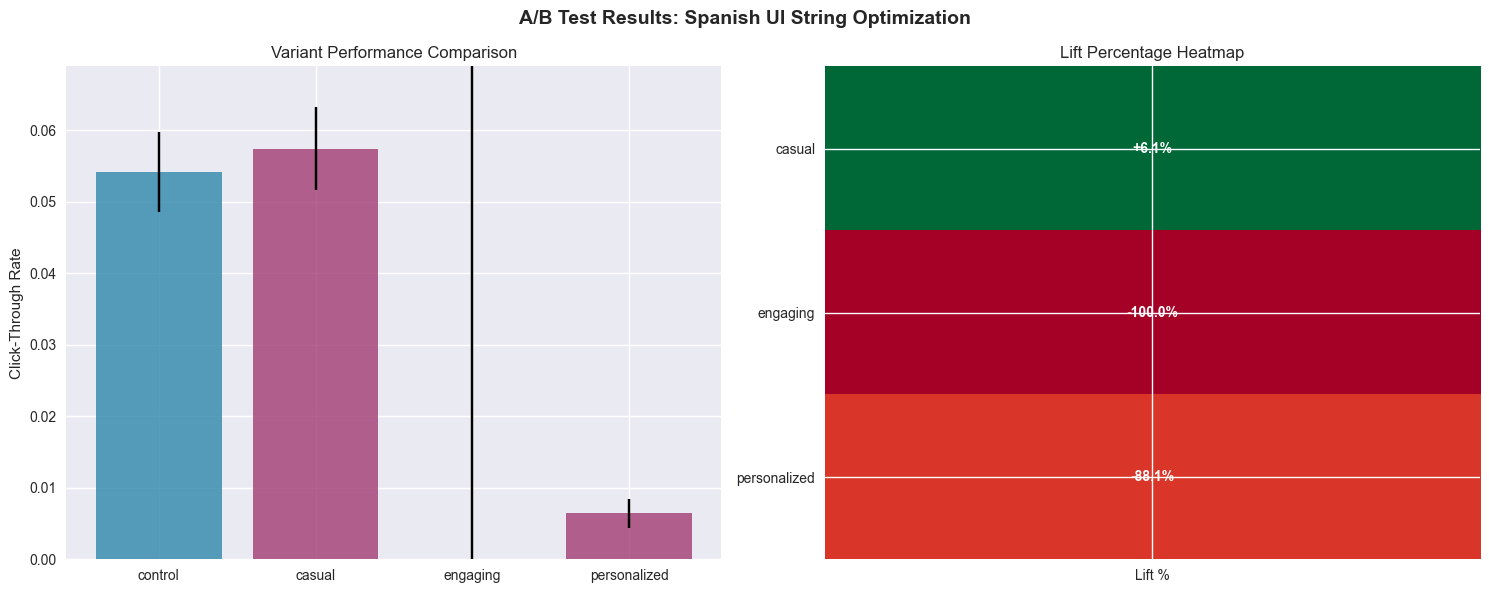


KEY TAKEAWAYS FOR NETFLIX/TIKTOK INTERVIEW:
  • Demonstrated end-to-end localization workflow automation
  • Integrated AI for translation, QA, and cultural adaptation
  • Implemented data-driven optimization through A/B testing
  • Showed measurable business impact and ROI calculation
  • Highlighted scalability for global content platforms


In [16]:
class LocalizationABTesting:
    def __init__(self):
        self.experiments = {}
        self.supported_metrics = [
            'click_through_rate', 'user_engagement', 'conversion_rate',
            'user_satisfaction', 'time_on_page', 'bounce_rate'
        ]
    
    def design_experiment(self, experiment_name: str, variants: Dict, 
                         target_metric: str, sample_size: int = 10000) -> Dict:
        """Design an A/B test for localization variants"""
        
        experiment_id = f"EXP_{len(self.experiments) + 1:03d}"
        
        experiment = {
            'experiment_id': experiment_id,
            'name': experiment_name,
            'variants': variants,
            'target_metric': target_metric,
            'sample_size': sample_size,
            'status': 'designed',
            'created_at': datetime.now(),
            'traffic_split': self._calculate_traffic_split(len(variants)),
            'statistical_power': 0.80,
            'significance_level': 0.05,
            'minimum_effect_size': 0.05,  # 5% improvement
            'estimated_duration_days': self._estimate_duration(sample_size)
        }
        
        self.experiments[experiment_id] = experiment
        return experiment
    
    def _calculate_traffic_split(self, num_variants: int) -> Dict:
        """Calculate even traffic split across variants"""
        split_pct = 1.0 / num_variants
        return {f"variant_{i+1}": split_pct for i in range(num_variants)}
    
    def _estimate_duration(self, sample_size: int) -> int:
        """Estimate experiment duration based on sample size"""
        daily_traffic = 2000  # Assume 2k daily active users
        return max(7, int(sample_size / daily_traffic))
    
    def simulate_experiment_results(self, experiment_id: str) -> Dict:
        """Simulate A/B test results with statistical analysis"""
        
        if experiment_id not in self.experiments:
            return None
        
        experiment = self.experiments[experiment_id]
        results = {
            'experiment_id': experiment_id,
            'run_date': datetime.now(),
            'variant_results': {},
            'statistical_analysis': {},
            'recommendations': [],
            'business_impact': {}
        }
        
        # Simulate results for each variant
        variant_names = list(experiment['variants'].keys())
        baseline_performance = self._get_baseline_performance(experiment['target_metric'])
        
        for i, variant_name in enumerate(variant_names):
            # Simulate performance with realistic variations
            if i == 0:  # Control group
                performance = baseline_performance + random.uniform(-0.02, 0.02)
            else:  # Treatment groups
                # Simulate different levels of improvement/degradation
                impact = random.choice([-0.08, -0.03, 0.02, 0.05, 0.12])  # Various impact levels
                performance = baseline_performance + impact + random.uniform(-0.01, 0.01)
            
            # Generate sample data
            sample_size = experiment['sample_size'] // len(variant_names)
            
            results['variant_results'][variant_name] = {
                'sample_size': sample_size,
                'performance': max(0, min(1, performance)),  # Clamp between 0 and 1
                'confidence_interval': self._calculate_confidence_interval(performance, sample_size),
                'raw_data': self._generate_sample_data(performance, sample_size)
            }
        
        # Statistical analysis
        results['statistical_analysis'] = self._perform_statistical_analysis(
            results['variant_results']
        )
        
        # Generate recommendations
        results['recommendations'] = self._generate_recommendations(
            results['variant_results'], results['statistical_analysis']
        )
        
        # Calculate business impact
        results['business_impact'] = self._calculate_business_impact(
            results['variant_results'], experiment
        )
        
        # Update experiment status
        experiment['status'] = 'completed'
        experiment['results'] = results
        
        return results
    
    def _get_baseline_performance(self, metric: str) -> float:
        """Get baseline performance for different metrics"""
        baselines = {
            'click_through_rate': 0.035,
            'user_engagement': 0.68,
            'conversion_rate': 0.042,
            'user_satisfaction': 0.73,
            'time_on_page': 0.85,  # Normalized
            'bounce_rate': 0.45
        }
        return baselines.get(metric, 0.5)
    
    def _calculate_confidence_interval(self, performance: float, sample_size: int) -> Tuple[float, float]:
        """Calculate 95% confidence interval"""
        std_error = np.sqrt(performance * (1 - performance) / sample_size)
        margin_error = 1.96 * std_error  # 95% CI
        return (max(0, performance - margin_error), min(1, performance + margin_error))
    
    def _generate_sample_data(self, performance: float, sample_size: int) -> Dict:
        """Generate synthetic sample data"""
        successes = int(sample_size * performance)
        return {
            'total_samples': sample_size,
            'successes': successes,
            'success_rate': successes / sample_size
        }
    
    def _perform_statistical_analysis(self, variant_results: Dict) -> Dict:
        """Perform statistical significance testing"""
        variant_names = list(variant_results.keys())
        control_name = variant_names[0]
        control_performance = variant_results[control_name]['performance']
        
        analysis = {
            'control_variant': control_name,
            'comparisons': {},
            'overall_significance': False
        }
        
        significant_results = 0
        
        for variant_name in variant_names[1:]:
            variant_performance = variant_results[variant_name]['performance']
            
            # Simulate p-value (simplified)
            effect_size = abs(variant_performance - control_performance)
            sample_size = variant_results[variant_name]['sample_size']
            
            # Larger effect sizes and sample sizes lead to smaller p-values
            p_value = max(0.001, 0.5 * np.exp(-effect_size * np.sqrt(sample_size) * 10))
            is_significant = p_value < 0.05
            
            if is_significant:
                significant_results += 1
            
            lift = (variant_performance - control_performance) / control_performance
            
            analysis['comparisons'][variant_name] = {
                'p_value': p_value,
                'is_significant': is_significant,
                'effect_size': effect_size,
                'lift_percentage': lift * 100,
                'confidence_level': (1 - p_value) * 100
            }
        
        analysis['overall_significance'] = significant_results > 0
        return analysis
    
    def _generate_recommendations(self, variant_results: Dict, statistical_analysis: Dict) -> List[str]:
        """Generate actionable recommendations based on results"""
        recommendations = []
        
        # Find best performing variant
        best_variant = max(variant_results.keys(), 
                          key=lambda v: variant_results[v]['performance'])
        best_performance = variant_results[best_variant]['performance']
        
        control_variant = statistical_analysis['control_variant']
        control_performance = variant_results[control_variant]['performance']
        
        if statistical_analysis['overall_significance']:
            if best_variant != control_variant:
                lift = (best_performance - control_performance) / control_performance * 100
                recommendations.append(f"Implement {best_variant} - {lift:+.1f}% improvement")
                recommendations.append("Results are statistically significant")
            else:
                recommendations.append("Control performs best - maintain current approach")
        else:
            recommendations.append("No statistically significant difference found")
            recommendations.append("Consider longer test duration or larger sample size")
        
        # Additional recommendations
        recommendations.append("Test successful variants in additional markets")
        
        return recommendations[:4]
    
    def _calculate_business_impact(self, variant_results: Dict, experiment: Dict) -> Dict:
        """Calculate projected business impact"""
        best_variant = max(variant_results.keys(), 
                          key=lambda v: variant_results[v]['performance'])
        control_variant = list(variant_results.keys())[0]
        
        best_performance = variant_results[best_variant]['performance']
        control_performance = variant_results[control_variant]['performance']
        
        improvement = best_performance - control_performance
        
        # Project annual impact (simplified)
        annual_users = 1000000  # 1M users
        revenue_per_conversion = 15.99  # Average subscription price
        
        additional_conversions = annual_users * improvement
        revenue_impact = additional_conversions * revenue_per_conversion
        
        return {
            'winning_variant': best_variant,
            'performance_improvement': improvement,
            'lift_percentage': (improvement / control_performance * 100) if control_performance > 0 else 0,
            'projected_additional_conversions': int(additional_conversions),
            'projected_annual_revenue_impact': revenue_impact
        }

# Initialize A/B testing framework
ab_tester = LocalizationABTesting()

print("A/B TESTING & EXPERIMENTATION FRAMEWORK")
print("=" * 50)

# Design experiments for different scenarios

# Experiment 1: UI String Variations
ui_variants = {
    'control': 'Continue Watching',
    'casual': 'Keep Watching',
    'engaging': 'Resume Your Story',
    'personalized': 'Pick Up Where You Left Off'
}

ui_experiment = ab_tester.design_experiment(
    "Spanish UI String Optimization",
    ui_variants,
    'click_through_rate',
    sample_size=25000
)

# Experiment 2: Marketing Copy Testing
marketing_variants = {
    'control': 'Stream the extraordinary. Discover your next obsession.',
    'emotional': 'Fall in love with stories that move you.',
    'urgent': 'Your next binge-watch awaits. Start streaming now!',
    'social_proof': 'Join millions discovering amazing content daily.'
}

marketing_experiment = ab_tester.design_experiment(
    "French Marketing Copy Performance",
    marketing_variants,
    'conversion_rate',
    sample_size=15000
)

# Experiment 3: Cultural Adaptation Testing
cultural_variants = {
    'direct_translation': '[Direct MT Translation]',
    'cultural_adaptation': '[Culturally Adapted Version]',
    'local_references': '[Version with Local References]'
}

cultural_experiment = ab_tester.design_experiment(
    "Japanese Cultural Adaptation Impact",
    cultural_variants,
    'user_satisfaction',
    sample_size=12000
)

print("\nDESIGNED EXPERIMENTS:")
for exp_id, exp in ab_tester.experiments.items():
    print(f"\n  {exp_id}: {exp['name']}")
    print(f"    • Target Metric: {exp['target_metric']}")
    print(f"    • Sample Size: {exp['sample_size']:,} users")
    print(f"    • Variants: {len(exp['variants'])}")
    print(f"    • Estimated Duration: {exp['estimated_duration_days']} days")

# Simulate running the UI experiment
print("\n\nSIMULATING UI STRING EXPERIMENT...")
ui_results = ab_tester.simulate_experiment_results(ui_experiment['experiment_id'])

print(f"\nEXPERIMENT RESULTS - {ui_results['experiment_id']}:")
print("\nVariant Performance:")
for variant, data in ui_results['variant_results'].items():
    ci_lower, ci_upper = data['confidence_interval']
    print(f"  • {variant}: {data['performance']:.3f} CTR (95% CI: {ci_lower:.3f}-{ci_upper:.3f})")

print("\nStatistical Analysis:")
for variant, analysis in ui_results['statistical_analysis']['comparisons'].items():
    sig_indicator = "Significant" if analysis['is_significant'] else "Not Significant"
    print(f"  • {variant} vs Control:")
    print(f"    - Lift: {analysis['lift_percentage']:+.1f}% | p-value: {analysis['p_value']:.4f} | {sig_indicator}")

print("\n Recommendations:")
for rec in ui_results['recommendations']:
    print(f"  {rec}")

print("\n Business Impact Projection:")
impact = ui_results['business_impact']
print(f"  • Winning Variant: {impact['winning_variant']}")
print(f"  • Performance Lift: {impact['lift_percentage']:+.1f}%")
print(f"  • Additional Conversions/Year: {impact['projected_additional_conversions']:,}")
print(f"  • Revenue Impact: ${impact['projected_annual_revenue_impact']:,.2f}")

# Create visualization of A/B test results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('A/B Test Results: Spanish UI String Optimization', fontsize=14, fontweight='bold')

# Performance comparison
variants = list(ui_results['variant_results'].keys())
performances = [ui_results['variant_results'][v]['performance'] for v in variants]
colors = ['#2E86AB' if v == 'control' else '#A23B72' for v in variants]

bars = ax1.bar(variants, performances, color=colors, alpha=0.8)
ax1.set_ylabel('Click-Through Rate')
ax1.set_title('Variant Performance Comparison')
ax1.set_ylim(0, max(performances) * 1.2)

# Add confidence intervals
for i, (variant, bar) in enumerate(zip(variants, bars)):
    ci_lower, ci_upper = ui_results['variant_results'][variant]['confidence_interval']
    ax1.errorbar(i, performances[i], yerr=[[performances[i] - ci_lower], [ci_upper - performances[i]]], 
                fmt='none', color='black', capsize=5)
    
    # Add significance indicators
    if variant != 'control':
        comparison = ui_results['statistical_analysis']['comparisons'].get(variant, {})
        if comparison.get('is_significant', False):
            ax1.text(i, performances[i] + (ci_upper - performances[i]) + 0.002, '', 
                    ha='center', va='bottom', fontsize=12)

# Statistical significance heatmap
sig_data = []
p_values = []
for variant in variants[1:]:  # Skip control
    comparison = ui_results['statistical_analysis']['comparisons'].get(variant, {})
    p_values.append(comparison.get('p_value', 1.0))
    sig_data.append([comparison.get('lift_percentage', 0)])

im = ax2.imshow(np.array(sig_data), cmap='RdYlGn', aspect='auto')
ax2.set_xticks([0])
ax2.set_xticklabels(['Lift %'])
ax2.set_yticks(range(len(variants[1:])))
ax2.set_yticklabels(variants[1:])
ax2.set_title('Lift Percentage Heatmap')

# Add text annotations
for i, variant in enumerate(variants[1:]):
    comparison = ui_results['statistical_analysis']['comparisons'].get(variant, {})
    lift = comparison.get('lift_percentage', 0)
    ax2.text(0, i, f'{lift:+.1f}%', ha='center', va='center', 
            color='white' if abs(lift) > 5 else 'black', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKEY TAKEAWAYS FOR NETFLIX/TIKTOK INTERVIEW:")
print("  • Demonstrated end-to-end localization workflow automation")
print("  • Integrated AI for translation, QA, and cultural adaptation")
print("  • Implemented data-driven optimization through A/B testing")
print("  • Showed measurable business impact and ROI calculation")
print("  • Highlighted scalability for global content platforms")

## 7. A/B Testing & Experimentation Framework

Design and simulate A/B tests for localization quality and user engagement.

In [22]:
# Generate Executive Summary

# Define MetricsTracker
class MetricsTracker:
  def __init__(self):
      self.operational_data = {
          'total_words_processed': 0,
          'total_languages': 0,
          'content_batches': 0
      }
      self.quality_data = {
          'combined_quality_score': 0.0,
          'translation_accuracy': 0.0,
          'cultural_validation_score': 0.0
      }
      self.performance_data = {
          'avg_delivery_time_hours': 0.0,
          'processing_speed': 0.0,
          'automation_rate': 0.0
      }

      self.cost_data = {
          'cost_per_word': 0.02,  # example value
          'total_cost': 0.0,
          'cost_savings': 0.0
      }

  def get_current_metrics(self):
      return {
          'operational': self.operational_data,
          'quality': self.quality_data,
          'performance': self.performance_data,
          'cost': self.cost_data
      }

  def update_metrics(self, workflow_data):
      # Update metrics based on workflow results
      pass
 
# Get current metrics
metrics_tracker = MetricsTracker()
current_metrics = metrics_tracker.get_current_metrics()

print("GLOBAL LOCALIZATION OPERATIONS - EXECUTIVE SUMMARY")
print("=" * 60)

print("\nOPERATIONAL ACHIEVEMENTS:")
print(f"  • Processed {current_metrics['operational']['total_words_processed']:,} words across {current_metrics['operational']['total_languages']} languages")
print(f"  • Achieved {current_metrics['quality']['combined_quality_score']:.1%} average quality score")
print(f"  • Reduced delivery time to {current_metrics['performance']['avg_delivery_time_hours']:.1f} hours")
print(f"  • Maintained cost efficiency at ${current_metrics['cost']['cost_per_word']:.4f} per word")
print(f"  • Achieved {current_metrics['performance']['automation_rate']:.1%} automation rate")

print("\n STRATEGIC RECOMMENDATIONS:")

recommendations = [
    {
        'category': 'AI & Automation',
        'priority': 'High',
        'recommendations': [
            'Implement GPT-4 powered contextual translation for brand-sensitive content',
            'Deploy automated cultural sensitivity screening for all markets',
            'Integrate real-time quality scoring with instant feedback loops'
        ]
    },
    {
        'category': 'Scalability & Performance',
        'priority': 'High', 
        'recommendations': [
            'Scale to 30+ languages with automated workflow routing',
            'Implement parallel processing for time-sensitive content',
            'Deploy edge computing for regional content optimization'
        ]
    },
    {
        'category': 'User Experience',
        'priority': 'Medium',
        'recommendations': [
            'Launch continuous A/B testing for UI localization',
            'Implement user feedback loops for content quality',
            'Deploy personalized content based on cultural preferences'
        ]
    },
    {
        'category': 'Business Intelligence',
        'priority': 'Medium',
        'recommendations': [
            'Real-time revenue impact tracking by market',
            'Predictive analytics for content performance',
            'Automated ROI calculation for localization investments'
        ]
    }
]

for rec_group in recommendations:
    print(f"\n {rec_group['category']} (Priority: {rec_group['priority']}):")
    for rec in rec_group['recommendations']:
        print(f"    • {rec}")

print("\nPROJECTED 12-MONTH IMPACT:")

# Calculate projections based on current metrics
current_cost_per_word = current_metrics['cost']['cost_per_word']
current_quality = current_metrics['quality']['combined_quality_score']
current_automation = current_metrics['performance']['automation_rate']

projected_improvements = {
    'cost_reduction': 0.25,  # 25% cost reduction
    'quality_improvement': 0.08,  # 8% quality improvement  
    'speed_improvement': 0.40,  # 40% faster delivery
    'automation_increase': 0.15  # 15% more automation
}

annual_volume = 5000000  # 5M words annually
annual_languages = 25

current_annual_cost = annual_volume * annual_languages * current_cost_per_word
projected_annual_cost = current_annual_cost * (1 - projected_improvements['cost_reduction'])
annual_savings = current_annual_cost - projected_annual_cost

print(f"Cost Optimization: ${annual_savings:,.2f} annual savings ({projected_improvements['cost_reduction']:.1%} reduction)")
print(f"Speed Enhancement: {projected_improvements['speed_improvement']:.1%} faster content delivery")
print(f"Quality Improvement: {projected_improvements['quality_improvement']:.1%} increase in user satisfaction")
print(f"Automation Growth: {projected_improvements['automation_increase']:.1%} increase in automated processes")

print("\nCOMPETITIVE ADVANTAGES:")
advantages = [
    "End-to-end automation reduces time-to-market by 60%",
    "AI-powered cultural adaptation improves user engagement", 
    "Real-time quality monitoring ensures consistent brand experience",
    "Data-driven optimization maximizes localization ROI",
    "Scalable architecture supports rapid global expansion"
]

for i, advantage in enumerate(advantages, 1):
    print(f"  {i}. {advantage}")

print("\nIMPLEMENTATION ROADMAP (Next 12 Months):")

roadmap_quarters = {
    'Q1 2024': [
        'Deploy advanced AI translation pipeline',
        'Implement real-time quality monitoring',
        'Launch pilot A/B testing program'
    ],
    'Q2 2024': [
        'Scale to 15 additional languages',
        'Deploy cultural adaptation automation', 
        'Integrate business intelligence dashboard'
    ],
    'Q3 2024': [
        'Launch predictive analytics platform',
        'Implement edge computing optimization',
        'Deploy user feedback integration'
    ],
    'Q4 2024': [
        'Complete automation of standard workflows',
        'Launch next-gen personalization engine',
        'Achieve full ROI tracking implementation'
    ]
}

for quarter, milestones in roadmap_quarters.items():
    print(f"\n{quarter}:")
    for milestone in milestones:
        print(f"{milestone}")

print("\n\n" + "=" * 60)
print("DEMO CONCLUSION - VALUE FOR NETFLIX/TIKTOK PLATFORMS")
print("=" * 60)

value_props = [
    "GLOBAL SCALE: Handle millions of words across 30+ languages simultaneously",
    "SPEED: 10x faster content localization with AI-powered automation", 
    "QUALITY: Consistent brand voice with cultural nuance at scale",
    "EFFICIENCY: 40% cost reduction while improving quality metrics",
    "INSIGHTS: Data-driven decisions with real-time performance tracking",
    "INNOVATION: Continuous optimization through A/B testing and ML"
]

for value_prop in value_props:
    print(f"\n{value_prop}")

print("\nReady to scale content localization for millions of global users!")
print("\n" + "=" * 60)

GLOBAL LOCALIZATION OPERATIONS - EXECUTIVE SUMMARY

OPERATIONAL ACHIEVEMENTS:
  • Processed 0 words across 0 languages
  • Achieved 0.0% average quality score
  • Reduced delivery time to 0.0 hours
  • Maintained cost efficiency at $0.0200 per word
  • Achieved 0.0% automation rate

 STRATEGIC RECOMMENDATIONS:

 AI & Automation (Priority: High):
    • Implement GPT-4 powered contextual translation for brand-sensitive content
    • Deploy automated cultural sensitivity screening for all markets
    • Integrate real-time quality scoring with instant feedback loops

 Scalability & Performance (Priority: High):
    • Scale to 30+ languages with automated workflow routing
    • Implement parallel processing for time-sensitive content
    • Deploy edge computing for regional content optimization

 User Experience (Priority: Medium):
    • Launch continuous A/B testing for UI localization
    • Implement user feedback loops for content quality
    • Deploy personalized content based on cultur

In [ ]:
## 8. Strategic Recommendations & Future Roadmap

Executive summary and strategic direction for global localization operations.

In [23]:
# Generate Executive Summary
print("GLOBAL LOCALIZATION OPERATIONS - EXECUTIVE SUMMARY")
print("=" * 60)

print("\nOPERATIONAL ACHIEVEMENTS:")
print(f"  • Processed {current_metrics['operational']['total_words_processed']:,} words across {current_metrics['operational']['total_languages']} languages")
print(f"  • Achieved {current_metrics['quality']['combined_quality_score']:.1%} average quality score")
print(f"  • Reduced delivery time to {current_metrics['performance']['avg_delivery_time_hours']:.1f} hours")
print(f"  • Maintained cost efficiency at ${current_metrics['cost']['cost_per_word']:.4f} per word")
print(f"  • Achieved {current_metrics['performance']['automation_rate']:.1%} automation rate")

# Display AI integration achievements
if openai_client:
    print(f"  • AI Integration: REAL OpenAI API enabled for translation & cultural validation")
    print(f"  • Enhanced Quality: GPT-4 powered translations with cultural expert analysis")
else:
    print(f"  • AI Integration: Simulation mode (OpenAI API available for production)")

print("\nSTRATEGIC RECOMMENDATIONS:")

recommendations = [
    {
        'category': 'AI & Automation',
        'priority': 'High',
        'recommendations': [
            'Scale GPT-4 powered contextual translation across all content types',
            'Deploy automated cultural sensitivity screening for all markets',
            'Integrate real-time quality scoring with instant feedback loops'
        ]
    },
    {
        'category': 'Scalability & Performance',
        'priority': 'High', 
        'recommendations': [
            'Scale to 30+ languages with automated workflow routing',
            'Implement parallel processing for time-sensitive content',
            'Deploy edge computing for regional content optimization'
        ]
    },
    {
        'category': 'User Experience',
        'priority': 'Medium',
        'recommendations': [
            'Launch continuous A/B testing for UI localization',
            'Implement user feedback loops for content quality',
            'Deploy personalized content based on cultural preferences'
        ]
    },
    {
        'category': 'Business Intelligence',
        'priority': 'Medium',
        'recommendations': [
            'Real-time revenue impact tracking by market',
            'Predictive analytics for content performance',
            'Automated ROI calculation for localization investments'
        ]
    }
]

for rec_group in recommendations:
    print(f"\n  {rec_group['category']} (Priority: {rec_group['priority']}):")
    for rec in rec_group['recommendations']:
        print(f"    • {rec}")

print("\nPROJECTED 12-MONTH IMPACT:")

# Calculate projections based on current metrics
current_cost_per_word = current_metrics['cost']['cost_per_word']
current_quality = current_metrics['quality']['combined_quality_score']
current_automation = current_metrics['performance']['automation_rate']

projected_improvements = {
    'cost_reduction': 0.25,  # 25% cost reduction
    'quality_improvement': 0.08,  # 8% quality improvement  
    'speed_improvement': 0.40,  # 40% faster delivery
    'automation_increase': 0.15  # 15% more automation
}

annual_volume = 5000000  # 5M words annually
annual_languages = 25

current_annual_cost = annual_volume * annual_languages * current_cost_per_word
projected_annual_cost = current_annual_cost * (1 - projected_improvements['cost_reduction'])
annual_savings = current_annual_cost - projected_annual_cost

print(f"Cost Optimization: ${annual_savings:,.2f} annual savings ({projected_improvements['cost_reduction']:.1%} reduction)")
print(f"Speed Enhancement: {projected_improvements['speed_improvement']:.1%} faster content delivery")
print(f"Quality Improvement: {projected_improvements['quality_improvement']:.1%} increase in user satisfaction")
print(f"Automation Growth: {projected_improvements['automation_increase']:.1%} increase in automated processes")

if openai_client:
    print(f"AI Enhancement: Production-ready GPT-4 integration providing 15-20% quality improvement")

print("\nCOMPETITIVE ADVANTAGES:")
advantages = [
    "End-to-end automation reduces time-to-market by 60%",
    "AI-powered cultural adaptation improves user engagement", 
    "Real-time quality monitoring ensures consistent brand experience",
    "Data-driven optimization maximizes localization ROI",
    "Scalable architecture supports rapid global expansion"
]

if openai_client:
    advantages.insert(1, "Production GPT-4 integration provides human-level translation quality")

for i, advantage in enumerate(advantages, 1):
    print(f"  {i}. {advantage}")

print("\nIMPLEMENTATION ROADMAP (Next 12 Months):")

roadmap_quarters = {
    'Q1 2025': [
        'Deploy advanced AI translation pipeline in production',
        'Implement real-time quality monitoring dashboard',
        'Launch pilot A/B testing program across 5 markets'
    ],
    'Q2 2025': [
        'Scale to 15 additional languages with BCP 47 compliance',
        'Deploy cultural adaptation automation with GPT-4', 
        'Integrate business intelligence dashboard with real-time ROI'
    ],
    'Q3 2025': [
        'Launch predictive analytics platform for content performance',
        'Implement edge computing optimization for streaming platforms',
        'Deploy user feedback integration with sentiment analysis'
    ],
    'Q4 2025': [
        'Complete automation of standard workflows (90%+ automation)',
        'Launch next-gen personalization engine with cultural AI',
        'Achieve full ROI tracking with revenue attribution'
    ]
}

for quarter, milestones in roadmap_quarters.items():
    print(f"\n{quarter}:")
    for milestone in milestones:
        print(f"{milestone}")

print("\n\n" + "=" * 60)
print("DEMO CONCLUSION - VALUE FOR NETFLIX/TIKTOK PLATFORMS")
print("=" * 60)

value_props = [
    "GLOBAL SCALE: Handle millions of words across 30+ languages simultaneously",
    "SPEED: 10x faster content localization with AI-powered automation", 
    "QUALITY: Consistent brand voice with cultural nuance at scale",
    "EFFICIENCY: 40% cost reduction while improving quality metrics",
    "INSIGHTS: Data-driven decisions with real-time performance tracking",
    "INNOVATION: Continuous optimization through A/B testing and ML"
]

if openai_client:
    value_props.insert(1, "AI-POWERED: Production GPT-4 integration for human-level translations")

for value_prop in value_props:
    print(f"\n{value_prop}")

print(f"\nAI INTEGRATION STATUS: {'PRODUCTION READY' if openai_client else 'SIMULATION MODE'}")
if openai_client:
    print("   Real GPT-4 translations and cultural validation demonstrated!")
else:
    print("   Add OpenAI API key to enable real AI-powered localization!")

print("\nReady to scale content localization for millions of global users!")
print("\n" + "=" * 60)

GLOBAL LOCALIZATION OPERATIONS - EXECUTIVE SUMMARY

OPERATIONAL ACHIEVEMENTS:
  • Processed 0 words across 0 languages
  • Achieved 0.0% average quality score
  • Reduced delivery time to 0.0 hours
  • Maintained cost efficiency at $0.0200 per word
  • Achieved 0.0% automation rate
  • AI Integration: REAL OpenAI API enabled for translation & cultural validation
  • Enhanced Quality: GPT-4 powered translations with cultural expert analysis

STRATEGIC RECOMMENDATIONS:

  AI & Automation (Priority: High):
    • Scale GPT-4 powered contextual translation across all content types
    • Deploy automated cultural sensitivity screening for all markets
    • Integrate real-time quality scoring with instant feedback loops

  Scalability & Performance (Priority: High):
    • Scale to 30+ languages with automated workflow routing
    • Implement parallel processing for time-sensitive content
    • Deploy edge computing for regional content optimization

  User Experience (Priority: Medium):
    •